# Retail Giant Sales Forecasting Assignment (Times Series)

## Business problem
Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.

As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Data Understanding And Preparation
Uploading data in Python file and checking. Converting the Order Date into a Date-time format into Month year format

In [8]:
data = pd.read_csv('Global+Superstore+Data.csv')
data['Order Date']= pd.to_datetime(data['Order Date'], format='%d-%m-%Y').dt.to_period('m')
data.head(12)

Order Date      Segment  Market     Sales     Profit
0     2012-07     Consumer      US  2309.650   762.1845
1     2013-02    Corporate    APAC  3709.395  -288.7650
2     2013-10     Consumer    APAC  5175.171   919.9710
3     2013-01  Home Office      EU  2892.510   -96.5400
4     2013-11     Consumer  Africa  2832.960   311.5200
5     2013-06    Corporate    APAC  2862.675   763.2750
6     2011-11     Consumer    APAC  1822.080   564.8400
7     2012-04     Consumer    APAC  5244.840   996.4800
8     2014-10    Corporate      US  5083.960  1906.4850
9     2012-01     Consumer      US  4297.644 -1862.3124
10    2011-04    Corporate      US  4164.050    83.2810
11    2012-04    Corporate    APAC  4626.150   647.5500

In [9]:
data.shape

(51290, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Order Date  51290 non-null  period[M]
 1   Segment     51290 non-null  object   
 2   Market      51290 non-null  object   
 3   Sales       51290 non-null  float64  
 4   Profit      51290 non-null  float64  
dtypes: float64(2), object(2), period[M](1)
memory usage: 2.0+ MB


### Constituting different Marketing Segment

In [11]:
data['Mar_Seg']= data['Market'] + '-' + data['Segment']
data.head(20)

Order Date      Segment  Market     Sales     Profit            Mar_Seg
0     2012-07     Consumer      US  2309.650   762.1845        US-Consumer
1     2013-02    Corporate    APAC  3709.395  -288.7650     APAC-Corporate
2     2013-10     Consumer    APAC  5175.171   919.9710      APAC-Consumer
3     2013-01  Home Office      EU  2892.510   -96.5400     EU-Home Office
4     2013-11     Consumer  Africa  2832.960   311.5200    Africa-Consumer
5     2013-06    Corporate    APAC  2862.675   763.2750     APAC-Corporate
6     2011-11     Consumer    APAC  1822.080   564.8400      APAC-Consumer
7     2012-04     Consumer    APAC  5244.840   996.4800      APAC-Consumer
8     2014-10    Corporate      US  5083.960  1906.4850       US-Corporate
9     2012-01     Consumer      US  4297.644 -1862.3124        US-Consumer
10    2011-04    Corporate      US  4164.050    83.2810       US-Corporate
11    2012-04    Corporate    APAC  4626.150   647.5500     APAC-Corporate
12    2011-12     Consumer    EMEA  2616.960  1151.4000      EMEA-Consumer
13    2012-11  Home Office   LATAM  2221.800   622.0200  LATAM-Home Office
14    2013-06     Consumer    APAC  3701.520  1036.0800      APAC-Consumer
15    2014-07    Corporate      EU  1869.588   186.9480       EU-Corporate
16    2014-11    Corporate      US  2249.910   517.4793       US-Corporate
17    2014-09    Corporate      EU  7958.580  3979.0800       EU-Corporate
18    2014-01    Corporate    APAC  2565.594    28.4040     APAC-Corporate
19    2014-12     Consumer  Africa  3409.740   818.2800    Africa-Consumer

In [12]:
data['Mar_Seg'].value_counts(ascending=True)

Canada-Home Office      72
Canada-Corporate       110
Canada-Consumer        202
Africa-Home Office     894
EMEA-Home Office       917
Africa-Corporate      1312
EMEA-Corporate        1574
EU-Home Office        1737
US-Home Office        1783
LATAM-Home Office     1920
APAC-Home Office      2020
Africa-Consumer       2381
EMEA-Consumer         2538
US-Corporate          3020
LATAM-Corporate       3053
EU-Corporate          3077
APAC-Corporate        3283
EU-Consumer           5186
US-Consumer           5191
LATAM-Consumer        5321
APAC-Consumer         5699
Name: Mar_Seg, dtype: int64

There are about 21 different Marketing segments as we can se above.Visualizing data below for easy understanding.

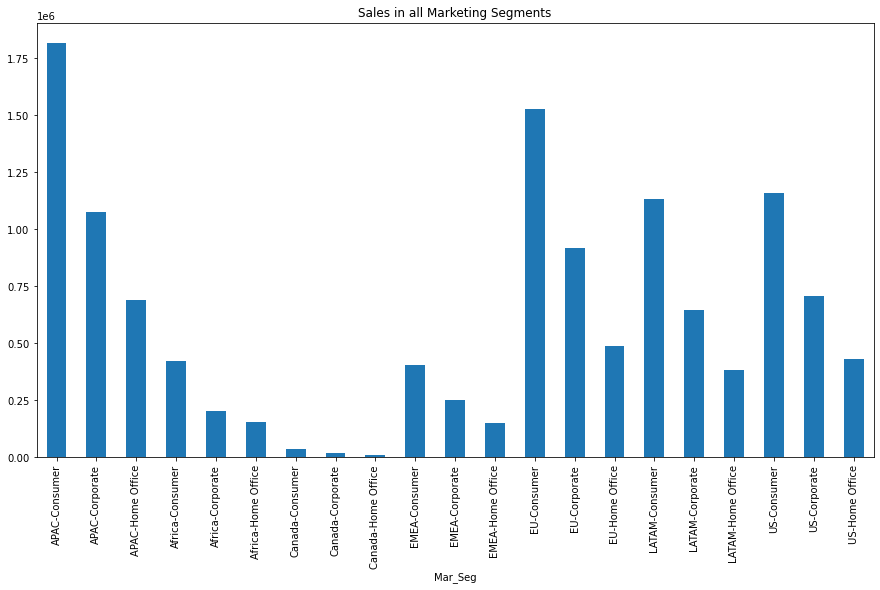

In [13]:
#Plotting graph between Sales in all 21 Segments

plt.figure(figsize=(15,8))
plt.title('Sales in all Marketing Segments')
data.groupby(by='Mar_Seg')['Sales'].sum().plot(kind='bar')
plt.show()


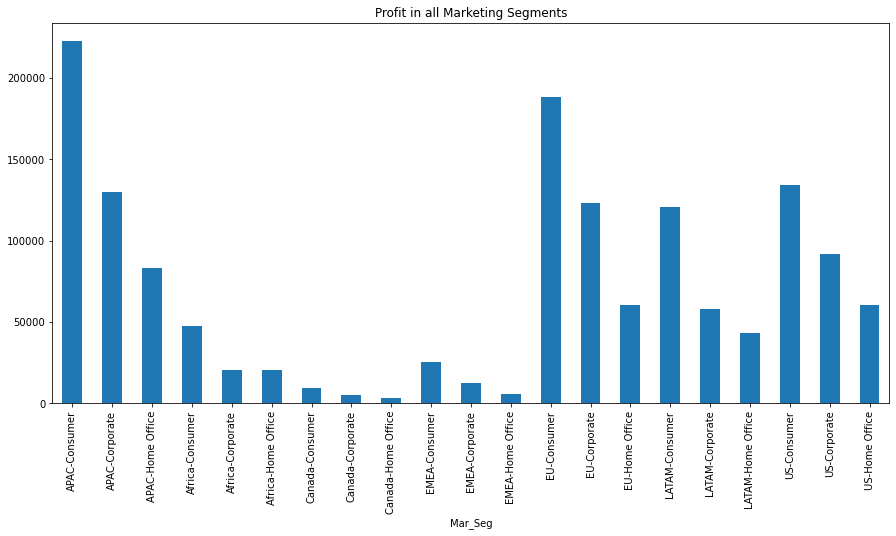

In [14]:
# Checking profits in all Segments

plt.figure(figsize=(15,7))
plt.title('Profit in all Marketing Segments')
data.groupby(by='Mar_Seg')['Profit'].sum().plot(kind='bar')
plt.show()



### Train-Test Split :
Taking 42 months as the train data and the 6 months as the test data.

In [15]:
# Preparing data before Train-Test Split
data_TT=data.pivot_table(index='Order Date', values='Profit', columns='Mar_Seg', aggfunc='sum')
data_TT.head(7)

Mar_Seg     APAC-Consumer  APAC-Corporate  APAC-Home Office  Africa-Consumer  \
Order Date                                                                     
2011-01          991.2825         11.5998           86.4423          475.683   
2011-02         1338.8688       4358.8254         -417.4128         1441.926   
2011-03         3747.1632       1213.3386          923.7492          322.140   
2011-04         3846.4746         71.0265          657.1080          292.122   
2011-05         3639.9423       2534.1672         -272.1717          110.004   
2011-06         4328.2596       1435.8294         3452.1018        -1290.639   
2011-07         1258.9617        525.4647          -42.0498          621.168   

Mar_Seg     Africa-Corporate  Africa-Home Office  Canada-Consumer  \
Order Date                                                          
2011-01              219.096             856.710             3.12   
2011-02             -490.551             820.302            23.31   
2011-03             -586.716              67.320           335.55   
2011-04              776.691             500.136            55.08   
2011-05              241.338              34.926            77.97   
2011-06             -259.218            -774.801             7.50   
2011-07              134.847            -506.562            47.28   

Mar_Seg     Canada-Corporate  Canada-Home Office  EMEA-Consumer  ...  \
Order Date                                                       ...   
2011-01                 5.70                 NaN      -2099.364  ...   
2011-02                  NaN               87.99        267.060  ...   
2011-03                  NaN               84.03       1598.718  ...   
2011-04                  NaN                 NaN       -300.879  ...   
2011-05                  NaN                 NaN        568.302  ...   
2011-06                40.08               23.40       -267.030  ...   
2011-07               528.33                8.40       -942.603  ...   

Mar_Seg     EMEA-Home Office  EU-Consumer  EU-Corporate  EU-Home Office  \
Order Date                                                                
2011-01              116.400    -845.8290      501.9315         975.360   
2011-02              216.690   -1808.1180     2988.4065        -181.041   
2011-03               78.972    2480.5410      736.9890         503.223   
2011-04             -420.090    2496.6405     1056.1785          63.858   
2011-05              262.968     254.0805     1586.2740         201.102   
2011-06            -2371.776    4317.4515     2270.8170        1210.293   
2011-07             -150.114     760.6920      916.9500         418.935   

Mar_Seg     LATAM-Consumer  LATAM-Corporate  LATAM-Home Office  US-Consumer  \
Order Date                                                                    
2011-01         1976.98976       1150.88400         -106.48800     762.8067   
2011-02          902.37752        721.25420          300.19936     500.2865   
2011-03         2585.17924         39.07512          285.46400     597.2773   
2011-04          387.72148        259.25600         -421.73440    1155.0757   
2011-05         1002.34724       -531.74444         -240.11600     698.9171   
2011-06         1039.27972       2558.46696          643.69764    3486.7664   
2011-07         1906.45620        303.29032          363.28400   -2227.2786   

Mar_Seg     US-Corporate  US-Home Office  
Order Date                                
2011-01         300.9145       1383.0499  
2011-02         307.2995         58.1420  
2011-03         333.0515       -431.5989  
2011-04        1393.3828        940.3767  
2011-05        2063.5013        -23.7088  
2011-06          67.0149       1422.7431  
2011-07        1308.7058         77.0902  

[7 rows x 21 columns]

In [16]:
data_TT.shape

(48, 21)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Order Date  51290 non-null  period[M]
 1   Segment     51290 non-null  object   
 2   Market      51290 non-null  object   
 3   Sales       51290 non-null  float64  
 4   Profit      51290 non-null  float64  
 5   Mar_Seg     51290 non-null  object   
dtypes: float64(2), object(3), period[M](1)
memory usage: 2.3+ MB


In [18]:
#Splitting data into Train Set and test Set

train_len=42
train=data_TT[:train_len]
test=data_TT[train_len:]

**Calculating Coefficient of Variance (CoV)** on the Profil for each of the 21 Marketing Segments on the training set

In [19]:
CoV = pd.DataFrame(columns = ['Segment', 'CoV'])

In [20]:
for i in data_TT.columns:
    var = {"Segment": i, "CoV": np.std(train[i])/np.mean(train[i])}
    CoV = CoV.append(var, ignore_index=True)
    
CoV.sort_values(by='CoV')

Segment       CoV
0        APAC-Consumer  0.596404
12         EU-Consumer  0.647485
15      LATAM-Consumer  0.680684
13        EU-Corporate  0.689346
1       APAC-Corporate  0.731926
16     LATAM-Corporate   0.88026
19        US-Corporate  1.027209
2     APAC-Home Office  1.048817
18         US-Consumer  1.095295
14      EU-Home Office  1.114681
7     Canada-Corporate   1.19722
20      US-Home Office  1.217133
17   LATAM-Home Office  1.343696
3      Africa-Consumer  1.429335
6      Canada-Consumer  1.476093
4     Africa-Corporate  1.664827
5   Africa-Home Office  1.989866
8   Canada-Home Office    2.1883
9        EMEA-Consumer  2.716992
11    EMEA-Home Office  6.066684
10      EMEA-Corporate  6.779639

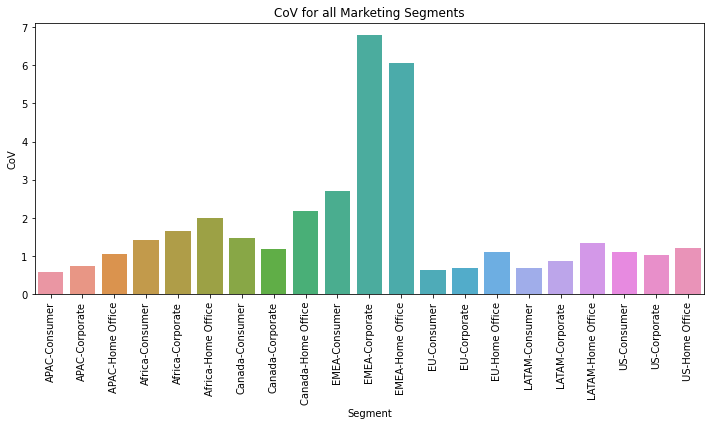

In [21]:
# showing same though Visualizing CoV data

import seaborn as sns
import warnings

plt.figure(figsize=(12,5))
plt.title('CoV for all Marketing Segments')
sns.barplot(data=CoV, x='Segment', y='CoV')
plt.xticks(rotation=90)
plt.show()

From above we can conclude that APAC-Consumer is having least CoV. Thus we will be going ahead with keeping this as base Marketing Segment for Analysis

## Model Building and Evaluation
**As we are going to do further Analysis on APAC-Consumer Constituting another dataframe for the same.**

In [22]:
APAC = data[data['Mar_Seg']=='APAC-Consumer']
APAC.head()

Order Date   Segment Market     Sales    Profit        Mar_Seg
2     2013-10  Consumer   APAC  5175.171   919.971  APAC-Consumer
6     2011-11  Consumer   APAC  1822.080   564.840  APAC-Consumer
7     2012-04  Consumer   APAC  5244.840   996.480  APAC-Consumer
14    2013-06  Consumer   APAC  3701.520  1036.080  APAC-Consumer
29    2012-02  Consumer   APAC  1878.720   582.360  APAC-Consumer

In [23]:
APAC.drop(['Segment','Market','Mar_Seg'], inplace=True,axis =1)


In [24]:
APAC.head()

Order Date     Sales    Profit
2     2013-10  5175.171   919.971
6     2011-11  1822.080   564.840
7     2012-04  5244.840   996.480
14    2013-06  3701.520  1036.080
29    2012-02  1878.720   582.360

In [25]:
APAC.set_index('Order Date')

Sales     Profit
Order Date                      
2013-10     5175.1710   919.9710
2011-11     1822.0800   564.8400
2012-04     5244.8400   996.4800
2013-06     3701.5200  1036.0800
2012-02     1878.7200   582.3600
...               ...        ...
2013-01       38.9709   -32.3991
2014-11        6.9000    -0.8400
2011-11       17.2800   -13.9200
2013-07       30.6180     1.0080
2013-08        4.5600     0.0000

[5699 rows x 2 columns]

In [26]:
APAC=APAC.groupby(by='Order Date').sum()

In [27]:
APAC.shape

(48, 2)

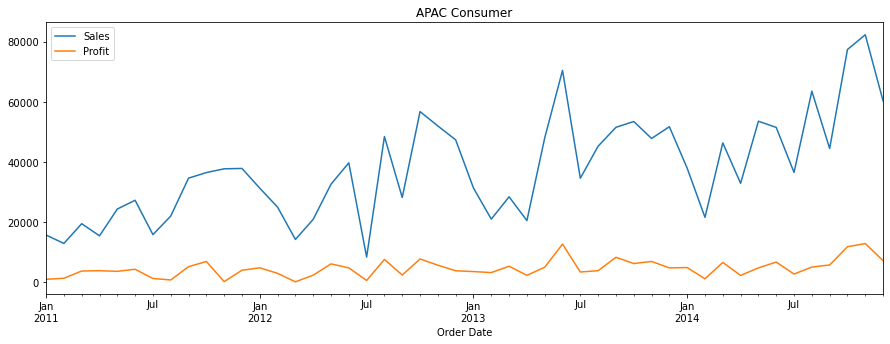

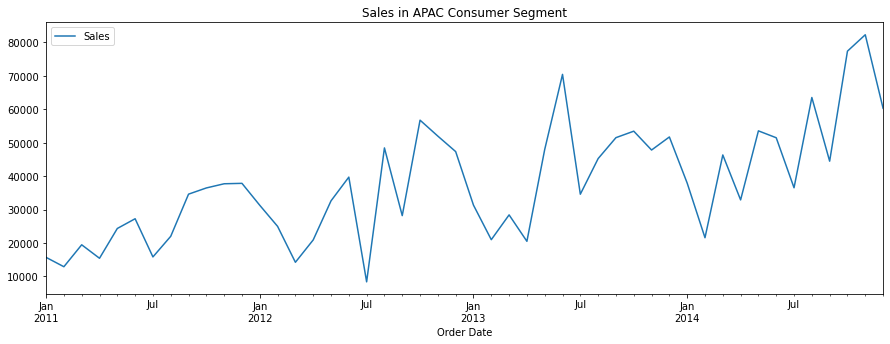

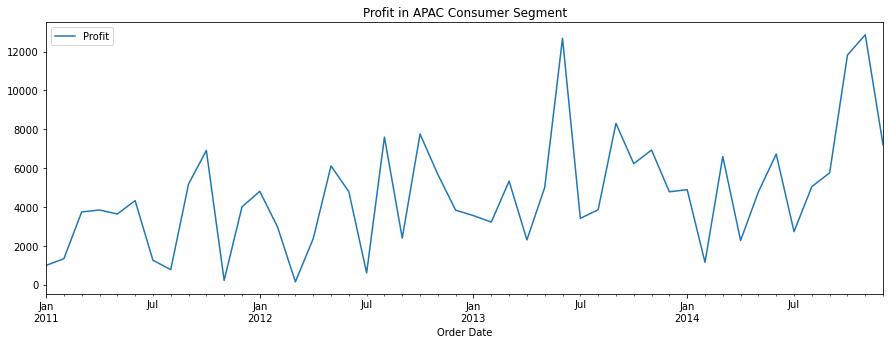

In [28]:
## Graphical representation of APAC Consumer dataset
APAC.plot(figsize=(15,5))
plt.legend(loc='best')
plt.title('APAC Consumer')
plt.show()

APAC['Sales'].plot(figsize=(15,5))
plt.legend(loc='best')
plt.title('Sales in APAC Consumer Segment')
plt.show()

APAC['Profit'].plot(figsize=(15,5))
plt.legend(loc='best')
plt.title('Profit in APAC Consumer Segment')
plt.show()

**Decompose the time-series** to get an idea of the trend, seasonality and residual parts of the data

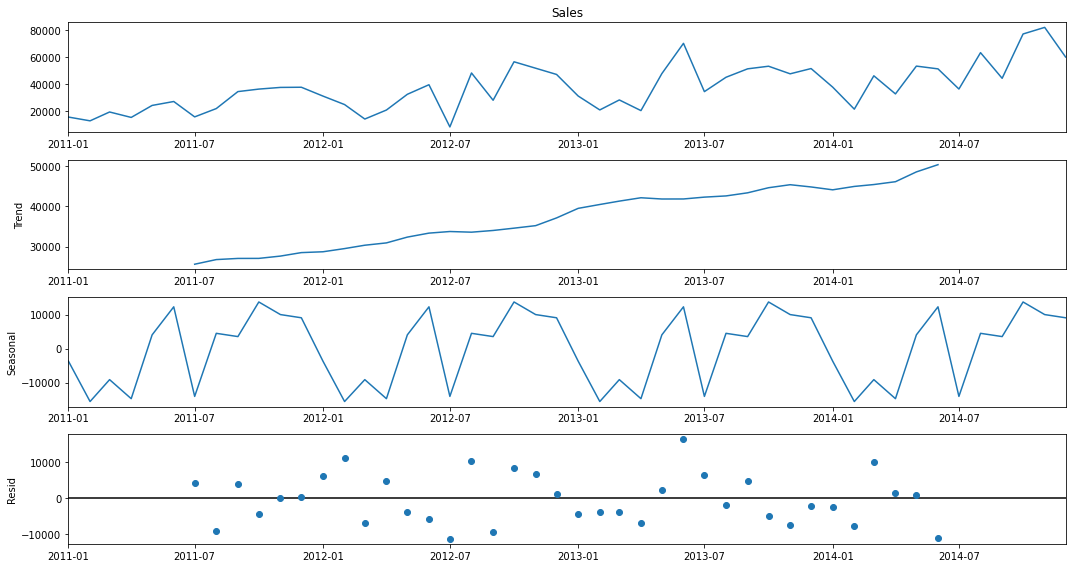

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
from statsmodels.tsa.seasonal import seasonal_decompose
APAC.Sales.interpolate(inplace = True)
APAC.Sales.index=APAC.Sales.index.to_timestamp()
decomposition = seasonal_decompose(APAC.Sales)
fig = decomposition.plot()
plt.show()

Above graphs depict that Sesonality exist in the data and positive trends as well.

In [30]:
APAC= APAC.to_timestamp()

In [31]:
train_len = 42
train= APAC[:train_len]
test = APAC[train_len:]

In [32]:
train.head()

Sales     Profit
Order Date                       
2011-01-01  15711.7125   991.2825
2011-02-01  12910.8588  1338.8688
2011-03-01  19472.5632  3747.1632
2011-04-01  15440.3046  3846.4746
2011-05-01  24348.9723  3639.9423

## Building Different Models for Forcasting

### Simple Exponential Smoothing

In [33]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

C:\Users\Anann\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


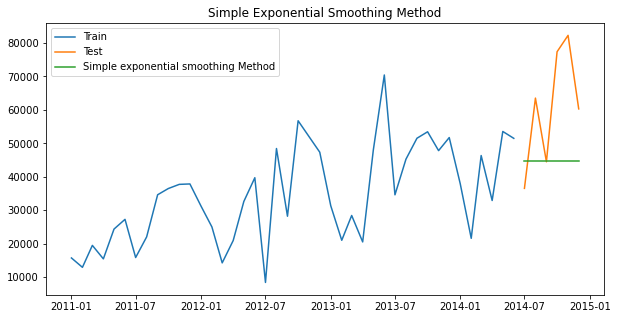

In [34]:
## Plotting Graph for above

plt.figure(figsize=(10,5))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing Method')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [35]:
## Calculating MAPE
from sklearn.metrics import mean_squared_error

mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing method'],'MAPE': [mape] })
results = results[['Method','MAPE' ]]
results


Method  MAPE
0  Simple exponential smoothing method  27.7

### Holt’s exponential smoothing

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 10555.930159999996, 'initial_trend': 2155.007810909092, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


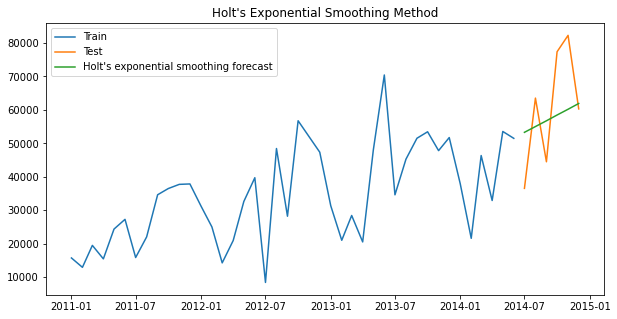

In [37]:
## Plotting Graph for Above

plt.figure(figsize=(10,5))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [38]:
## Calculating MAPE

mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

Method  MAPE
0  Simple exponential smoothing method  27.7
0  Holt's exponential smoothing method  27.7

### Holt Winters' additive method with trend and seasonality

In [39]:
#Assuming Trend and Seasonality to be Additive
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['HW_Forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 25191.87885499998, 'initial_trend': 549.1511154545475, 'initial_seasons': array([ -3046.57535417, -12233.28766042, -14734.34056667, -16050.40451667,
         2962.22100208,  17242.34903958, -17814.35478542,   4804.01762083,
          623.89353958,  15536.36958958,  13175.71666458,   9534.39542708]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Anann\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


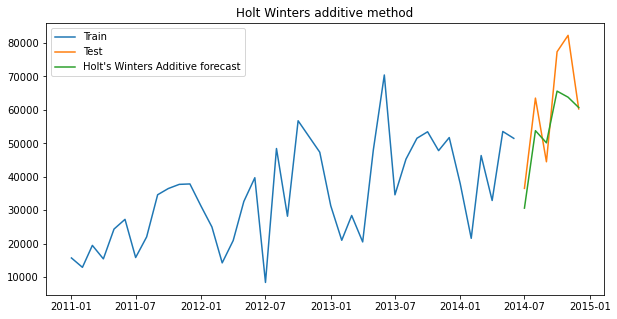

In [40]:

plt.figure(figsize=(10,5))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['HW_Forecast'], label='Holt\'s Winters Additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters additive method')
plt.show()

In [41]:
## Calculating MAPE

mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['HW_Forecast'])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':["Holt Winter's Additive Method"],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

Method   MAPE
0  Simple exponential smoothing method  27.70
0  Holt's exponential smoothing method  27.70
0        Holt Winter's Additive Method  13.77

### HOLT'S WINTER MULTIPLICATIVE METHOD

In [42]:
#Assuming Trend to be Multiplicative and Seasonality to be Additive
from statsmodels.tsa.holtwinters import ExponentialSmoothing
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['HW_Forecast_2'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.07107142857142858, 'damping_trend': nan, 'initial_level': 25191.87885499998, 'initial_trend': 549.1511154545475, 'initial_seasons': array([0.93074061, 0.67529696, 0.57227633, 0.57532186, 1.06552983,
       1.42137084, 0.42860295, 1.11971051, 1.04228985, 1.47741289,
       1.40453147, 1.28691591]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Anann\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


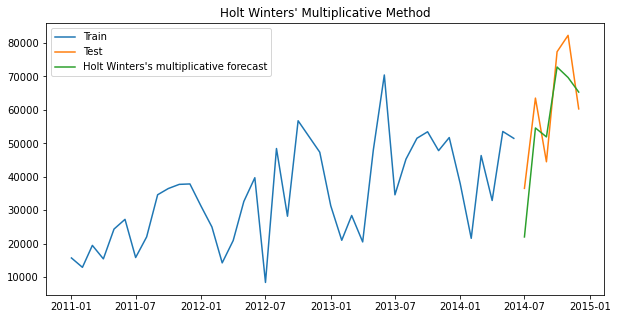

In [43]:
## Ploting the above
plt.figure(figsize=(10,5))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['HW_Forecast_2'], label='Holt Winters\'s multiplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Multiplicative Method')
plt.show()


In [44]:
## Calculating MAPE

mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['HW_Forecast_2'])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':["Holt Winter's Multipicative Method"],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

Method   MAPE
0  Simple exponential smoothing method  27.70
0  Holt's exponential smoothing method  27.70
0        Holt Winter's Additive Method  13.77
0   Holt Winter's Multipicative Method  16.69

#### Conclusion: 
Out of all methods which we have performed above Holt Winters Methods have performed exceptionally well and have lowest MAPE values which shows that the model is accurate.



## Auto Regression Models

### KPSS test

In [45]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 19.517419
Critical Values @ 0.05: 0.46
p-value: 0.010000


C:\Users\Anann\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


The p-value is less than 0.05 and thus, our Null Hypothesis that the data is stationary gets rejected over here. We have to take necessary steps such as differencing and boxcox transformation to make this dataset stationary and suitable for Auto Regression Models.

As p-value is is less than 0.5 shows that are data is unstable so rejecting Null hypothesis - which states data is Stable.  

For AR Models we need to make data stable for which we will be using BOX-COX Transformation and Differencing

#### BOX-COX Transformation
Keeping Lambda = 0

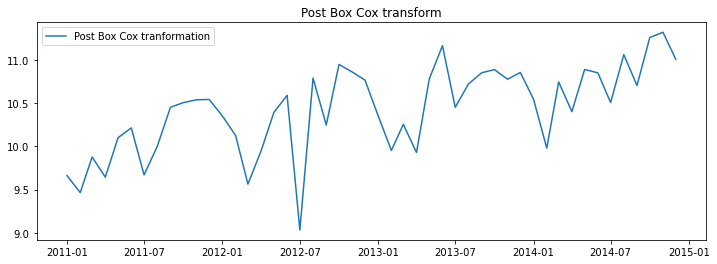

In [46]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(APAC['Sales'], lmbda=0), index = APAC.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='Post Box Cox tranformation')
plt.legend(loc='best')
plt.title('Post Box Cox transform')
plt.show()

####  Differencing

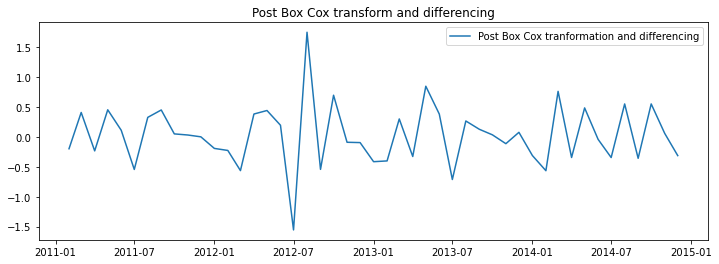

In [47]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), APAC.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='Post Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('Post Box Cox transform and differencing')
plt.show()

In [48]:
data_boxcox_diff.dropna(inplace=True)
data_boxcox_diff.tail()

Order Date
2014-08-01    0.553405
2014-09-01   -0.356405
2014-10-01    0.553748
2014-11-01    0.061479
2014-12-01   -0.311004
Freq: MS, dtype: float64

#### Train test Splitting
Before proceding to ARIMA Methods

In [49]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

## Auto Regressive Models
### AR Model

In [50]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const     0.031315
ar.L1    -0.483974
sigma2    0.211971
dtype: float64


In [51]:
## Recovering original time series

y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

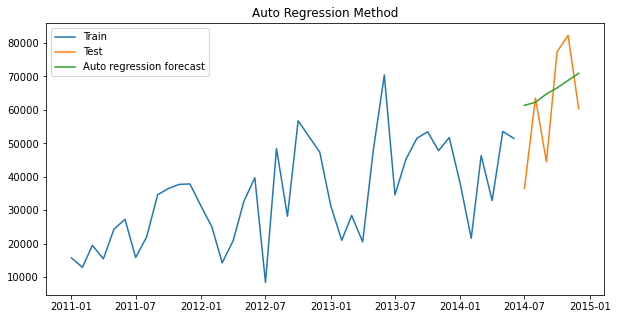

In [52]:
plt.figure(figsize=(10,5))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [53]:
# Calculate MAPE

mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regression Method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

Method   MAPE
0  Simple exponential smoothing method  27.70
0  Holt's exponential smoothing method  27.70
0        Holt Winter's Additive Method  13.77
0   Holt Winter's Multipicative Method  16.69
0               Auto Regression Method  27.26

#### Moving Average(MA) Model

In [54]:
#Making the most basic Moving Average Model
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const     0.022689
ma.L1    -0.999630
sigma2    0.155059
dtype: float64


In [55]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

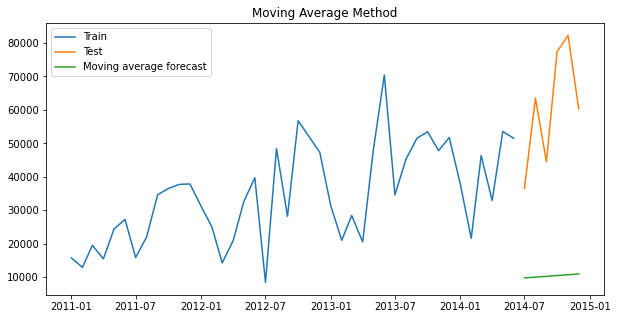

In [56]:
#Make a plot of train, test and forecast
plt.figure(figsize=(10,5))
plt.plot(APAC['Sales'][:train_len], label='Train')
plt.plot(APAC['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [57]:
# Calculating MAPE

mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average Method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

Method   MAPE
0  Simple exponential smoothing method  27.70
0  Holt's exponential smoothing method  27.70
0        Holt Winter's Additive Method  13.77
0   Holt Winter's Multipicative Method  16.69
0               Auto Regression Method  27.26
0                Moving Average Method  81.67

#### Autoregressive moving average(ARMA) Model

In [58]:
#Making the ARMA Model
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const     0.022805
ar.L1     0.115924
ma.L1    -0.999963
sigma2    0.153805
dtype: float64


In [59]:
#Transformation to the original form by performing cumulative sum to remove differencing and exponenting to remove boxcox transform.
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

In [60]:
## Calculating MAPE

mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

Method   MAPE
0          Simple exponential smoothing method  27.70
0          Holt's exponential smoothing method  27.70
0                Holt Winter's Additive Method  13.77
0           Holt Winter's Multipicative Method  16.69
0                       Auto Regression Method  27.26
0                        Moving Average Method  81.67
0  Autoregressive moving average (ARMA) method  77.69

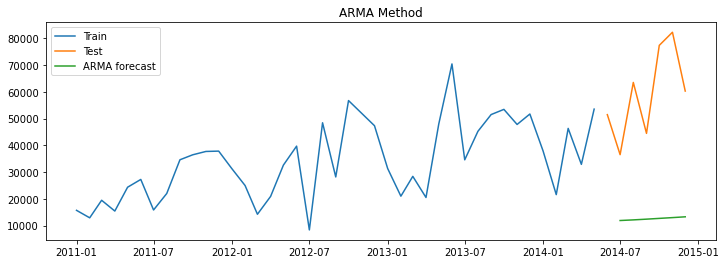

In [61]:
## Plotting Graph

plt.figure(figsize=(12,4))
plt.plot( APAC['Sales'][:train_len-1], label='Train')
plt.plot(APAC['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

#### ARIMA Model

In [62]:
#Making the ARIMA Model

model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

ar.L1     0.124018
ma.L1    -0.815404
sigma2    0.187389
dtype: float64


In [63]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

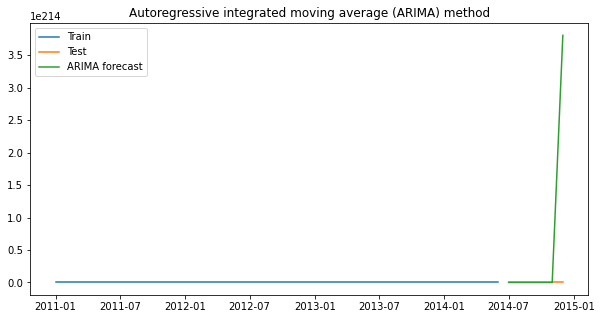

In [64]:
# Plotting graph for ARIMA Model:
    
plt.figure(figsize=(10,5))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [65]:
# Calculating MAPE

mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results


Method           MAPE
0                Simple exponential smoothing method   2.770000e+01
0                Holt's exponential smoothing method   2.770000e+01
0                      Holt Winter's Additive Method   1.377000e+01
0                 Holt Winter's Multipicative Method   1.669000e+01
0                             Auto Regression Method   2.726000e+01
0                              Moving Average Method   8.167000e+01
0        Autoregressive moving average (ARMA) method   7.769000e+01
0  Autoregressive integrated moving average (ARIM...  1.051817e+211

#### Seasonal autoregressive integrated moving average(SARIMA) Model

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.099689
ma.L1      -0.994635
ar.S.L12   -0.396340
ma.S.L12   -0.986822
sigma2      0.047238
dtype: float64


In [67]:
#Making Predictions
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

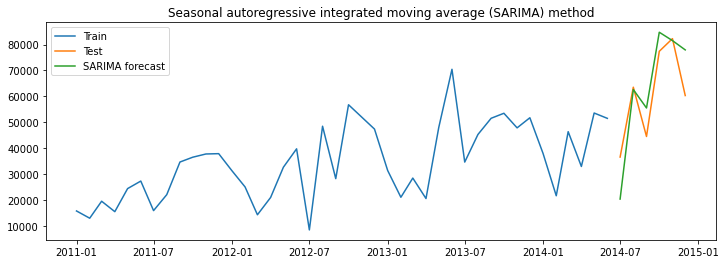

In [68]:
## Plotting Graph

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [69]:
## Calculating MAPE

mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

Method           MAPE
0                Simple exponential smoothing method   2.770000e+01
0                Holt's exponential smoothing method   2.770000e+01
0                      Holt Winter's Additive Method   1.377000e+01
0                 Holt Winter's Multipicative Method   1.669000e+01
0                             Auto Regression Method   2.726000e+01
0                              Moving Average Method   8.167000e+01
0        Autoregressive moving average (ARMA) method   7.769000e+01
0  Autoregressive integrated moving average (ARIM...  1.051817e+211
0  Seasonal autoregressive integrated moving aver...   1.838000e+01

## Conclusion :

After constituting all the models Holts Winters and SARIMA models has performed the best with most accurate values as they are able to capture Trends and seasonality both. As the data belong to a Mart definately it will have some seasonality and may be positive or negative trend as sales is not the same across the year.

